In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os

train_dir = r"D:\00FishDL\train"
print("Path Exists:", os.path.exists(train_dir))
print("Contents:", os.listdir(train_dir) if os.path.exists(train_dir) else "Does not exist")

Path Exists: True
Contents: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [ ]:
train_dir = r"D:\00FishDL\train"
val_dir = r"D:\00FishDL\val"
test_dir = r"D:\00FishDL\test"

img_size = (292, 292)
batch_size = 32

In [4]:
# Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize to [0,1]
    rotation_range=20,        # Random rotation
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    width_shift_range=0.2,    # Width shift
    height_shift_range=0.2,   # Height shift
    shear_range=0.15,         # Shear transform
    fill_mode='nearest'       # Filling in new pixels
)

In [5]:
# Only rescaling for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load validation data
val_generator = val_test_datagen.flow_from_directory(
    directory=val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load test data
test_generator = val_test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [6]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import PIL
print(PIL.__version__)

11.2.1


In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Shape of image batch: (32, 292, 292, 3)
Min pixel value: 0.0
Max pixel value: 1.0


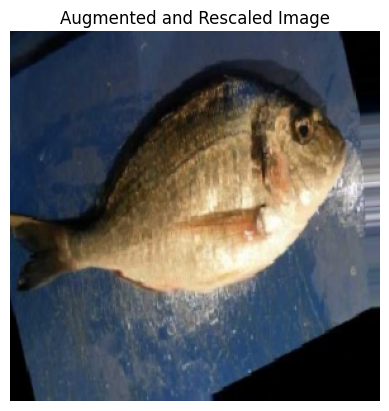

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels
images, labels = next(train_generator)

# Check shape and pixel range
print("Shape of image batch:", images.shape)
print("Min pixel value:", np.min(images))
print("Max pixel value:", np.max(images))

# Show one example image
plt.imshow(images[0])
plt.title("Augmented and Rescaled Image")
plt.axis('off')
plt.show()

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(292, 292, 3)))  # First conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))                                     # Downsampling

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into Dense layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))  # softmax for multiclass


In [11]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(
    train_generator,
    validation_data=val_test_datagen.flow_from_directory(
        val_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    ),
    epochs=5
)

Found 1092 images belonging to 11 classes.
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - accuracy: 0.2645 - loss: 2.1865 - val_accuracy: 0.5467 - val_loss: 1.3754
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.4726 - loss: 1.4606 - val_accuracy: 0.6364 - val_loss: 1.0052
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 285s 1s/step - accuracy: 0.5673 - loss: 1.1683 - val_accuracy: 0.7170 - val_loss: 0.8363
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.6287 - loss: 1.0127 - val_accuracy: 0.7582 - val_loss: 0.7051
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.6857 - loss: 0.8619 - val_accuracy: 0.8315 - val_loss: 0.5399


In [21]:
# Model Accuracy
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")

100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 246ms/step - accuracy: 0.8956 - loss: 0.3686
Test accuracy: 83.68%


In [22]:
# Classification Report (Precision, Recall, F1)
from sklearn.metrics import classification_report

# Predict on test data
y_probs = model.predict(test_generator)
y_pred = np.argmax(y_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print detailed report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report of CNN:\n", report)


100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 251ms/step
Classification Report of CNN:
                                   precision    recall  f1-score   support

                     animal fish       0.97      0.98      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.79      0.97      0.87       298
   fish sea_food gilt_head_bream       0.59      0.69      0.63       305
   fish sea_food hourse_mackerel       0.92      0.85      0.88       286
        fish sea_food red_mullet       0.92      1.00      0.96       291
     fish sea_food red_sea_bream       0.79      0.58      0.67       273
          fish sea_food sea_bass       0.69      0.76      0.72       327
            fish sea_food shrimp       0.88      0.96      0.92       289
fish sea_food striped_red_mullet       0.92      0.71      0.80       293
             fish sea_food trout       0.92      0.79      0.85       292

                        accuracy   

c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix of CNN:\n", cm)

Confusion Matrix of CNN:
 [[512   0   1   1   0   6   0   0   0   0   0]
 [ 13   0   0   0   0   0   0   0   0   0   0]
 [  0   0 289   0   4   0   0   0   0   5   0]
 [  2   0   5 209   2   0  37  39   0   1  10]
 [  0   0  39   1 243   0   0   0   0   0   3]
 [  0   0   0   0   0 291   0   0   0   0   0]
 [  0   0   8  62   3   0 158  36   0   0   6]
 [  0   0  25  37   1   0   5 248   0  10   1]
 [  0   0   0   0   0   9   0   0 277   3   0]
 [  0   0   0   0   3  11   0  32  38 209   0]
 [  0   0   0  46   9   0   1   5   0   0 231]]


In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r'D:\00FishDL\test\fish sea_food red_mullet\0DTLG8H3NN5N.jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(292, 292))  # Resize to match training size
img_array = image.img_to_array(img)                     # Convert to numpy array (H, W, C)
img_array = img_array / 255.0                           # Normalize to [0,1] like training
img_array = np.expand_dims(img_array, axis=0)           # Add batch dimension -> (1, 128, 128, 3)

# Make prediction
pred = model.predict(img_array)
predicted_class_index = np.argmax(pred, axis=1)[0]

# Get the class labels from the training generator
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Predicted class: fish sea_food red_mullet


In [26]:
# 5 Pre-Model Training
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [27]:
# VGG16 — Transfer Learning & Fine-tuning

Num_classes = 11
Epochs = 5
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Load base model (exclude top)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(Num_classes, activation='softmax')(x)

model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Save only best model
checkpoint = ModelCheckpoint('vgg16_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train
history_vgg16 = model_vgg16.fit(
    train_generator,
    validation_data=val_generator,
    epochs=Epochs,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1643 - loss: 2.4383

c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 1160s 6s/step - accuracy: 0.1645 - loss: 2.4376 - val_accuracy: 0.4002 - val_loss: 2.0227
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2858 - loss: 2.0520

195/195 ━━━━━━━━━━━━━━━━━━━━ 1242s 6s/step - accuracy: 0.2859 - loss: 2.0517 - val_accuracy: 0.5027 - val_loss: 1.8372
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3823 - loss: 1.8767

195/195 ━━━━━━━━━━━━━━━━━━━━ 1226s 6s/step - accuracy: 0.3824 - loss: 1.8765 - val_accuracy: 0.6447 - val_loss: 1.6860
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.4527 - loss: 1.7166

195/195 ━━━━━━━━━━━━━━━━━━━━ 1743s 9s/step - accuracy: 0.4528 - loss: 1.7165 - val_accuracy: 0.6978 - val_loss: 1.5640
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5211 - loss: 1.6084

195/195 ━━━━━━━━━━━━━━━━━━━━ 1313s 7s/step - accuracy: 0.5211 - loss: 1.6083 - val_accuracy: 0.7051 - val_loss: 1.4574


100/100 ━━━━━━━━━━━━━━━━━━━━ 532s 5s/step
Classification Report for VGG16:
                                   precision    recall  f1-score   support

                     animal fish       0.94      0.98      0.96       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.76      0.86      0.81       298
   fish sea_food gilt_head_bream       0.82      0.39      0.53       305
   fish sea_food hourse_mackerel       0.80      0.69      0.74       286
        fish sea_food red_mullet       0.53      0.52      0.52       291
     fish sea_food red_sea_bream       0.78      0.81      0.79       273
          fish sea_food sea_bass       0.75      0.69      0.72       327
            fish sea_food shrimp       0.57      0.96      0.72       289
fish sea_food striped_red_mullet       0.57      0.38      0.45       293
             fish sea_food trout       0.72      0.91      0.81       292

                        accuracy  

c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

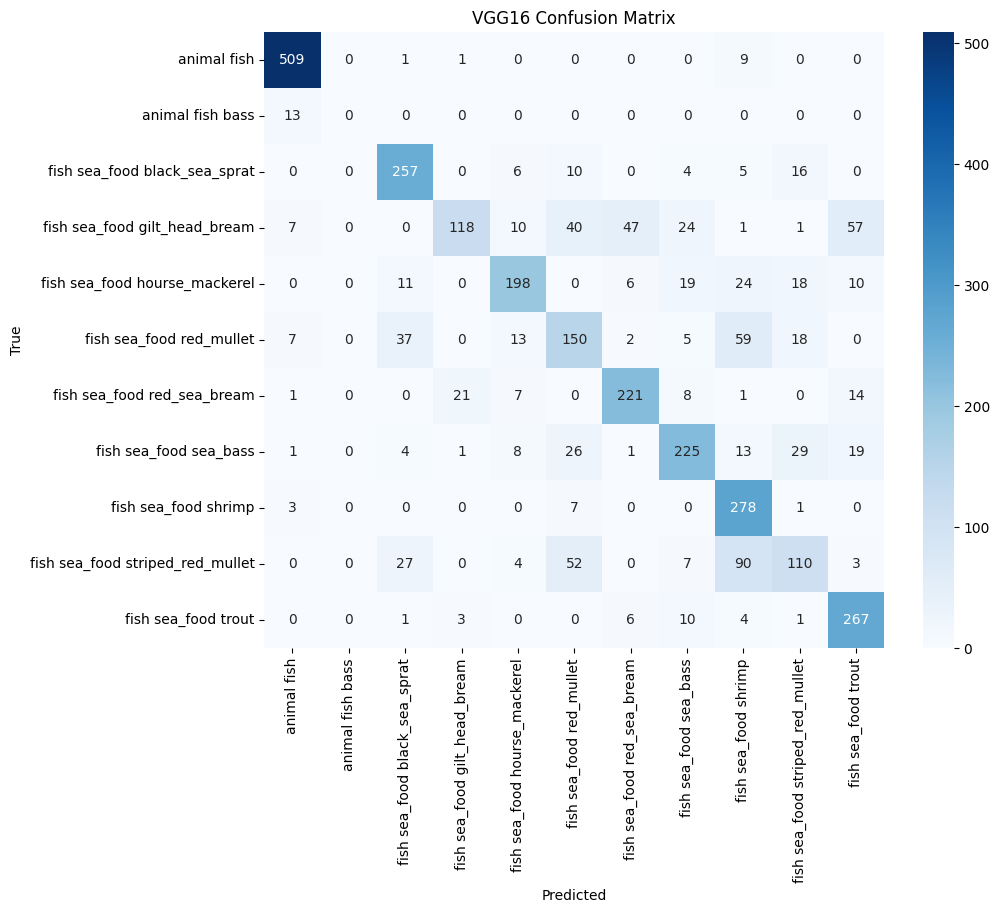

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load best model
model_vgg16 = tf.keras.models.load_model('vgg16_model.h5')

# Predict on test set
Y_pred = model_vgg16.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
report_vgg = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
print("Classification Report for VGG16:\n", classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_mat)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(), cmap='Blues')
plt.title('VGG16 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

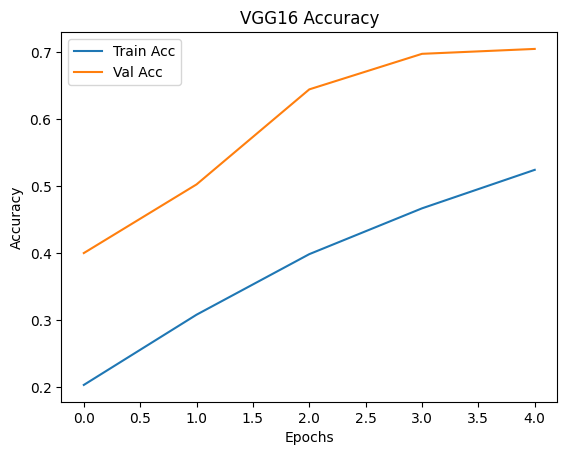

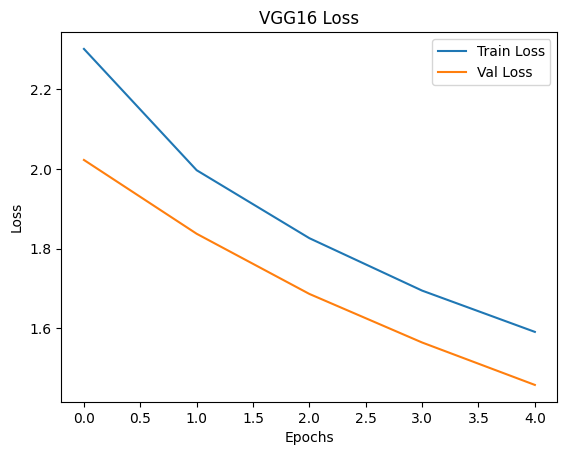

In [29]:
# plotting training history

# Accuracy
plt.plot(history_vgg16.history['accuracy'], label='Train Acc')
plt.plot(history_vgg16.history['val_accuracy'], label='Val Acc')
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history_vgg16.history['loss'], label='Train Loss')
plt.plot(history_vgg16.history['val_loss'], label='Val Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# ResNet50

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [31]:
# Load base model
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model_resnet.trainable = False  # Freeze pre-trained layers

# Add custom top layers
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(Num_classes, activation='softmax')(x)

model_resnet = Model(inputs=base_model_resnet.input, outputs=x)

model_resnet.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [32]:
checkpoint_resnet = ModelCheckpoint("resnet_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_resnet = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_resnet = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint_resnet, early_stop_resnet]
    )

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1482 - loss: 2.3741

195/195 ━━━━━━━━━━━━━━━━━━━━ 722s 4s/step - accuracy: 0.1483 - loss: 2.3738 - val_accuracy: 0.1712 - val_loss: 2.2941
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1915s 10s/step - accuracy: 0.1835 - loss: 2.2679 - val_accuracy: 0.1712 - val_loss: 2.2736
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2092 - loss: 2.2063

195/195 ━━━━━━━━━━━━━━━━━━━━ 587s 3s/step - accuracy: 0.2092 - loss: 2.2063 - val_accuracy: 0.2216 - val_loss: 2.1970
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 602s 3s/step - accuracy: 0.1986 - loss: 2.1940 - val_accuracy: 0.1731 - val_loss: 2.2262
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 582s 3s/step - accuracy: 0.2190 - loss: 2.1517 - val_accuracy: 0.1795 - val_loss: 2.1746
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2189 - loss: 2.1269

195/195 ━━━━━━━━━━━━━━━━━━━━ 616s 3s/step - accuracy: 0.2189 - loss: 2.1269 - val_accuracy: 0.2527 - val_loss: 2.1245
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2339 - loss: 2.1133

195/195 ━━━━━━━━━━━━━━━━━━━━ 613s 3s/step - accuracy: 0.2339 - loss: 2.1133 - val_accuracy: 0.2729 - val_loss: 2.0829
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 602s 3s/step - accuracy: 0.2400 - loss: 2.0991 - val_accuracy: 0.2033 - val_loss: 2.0810
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2671s 14s/step - accuracy: 0.2430 - loss: 2.0581 - val_accuracy: 0.2335 - val_loss: 2.0231
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 603s 3s/step - accuracy: 0.2464 - loss: 2.0400 - val_accuracy: 0.2372 - val_loss: 2.0511


100/100 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step
Classification Report for ResNet50:
                                  precision    recall  f1-score   support

                     animal fish       0.39      0.76      0.52       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.17      0.26      0.21       286
        fish sea_food red_mullet       0.18      0.65      0.29       291
     fish sea_food red_sea_bream       0.33      0.11      0.16       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.22      0.16      0.18       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.31      0.44      0.36       292

                        accuracy

c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

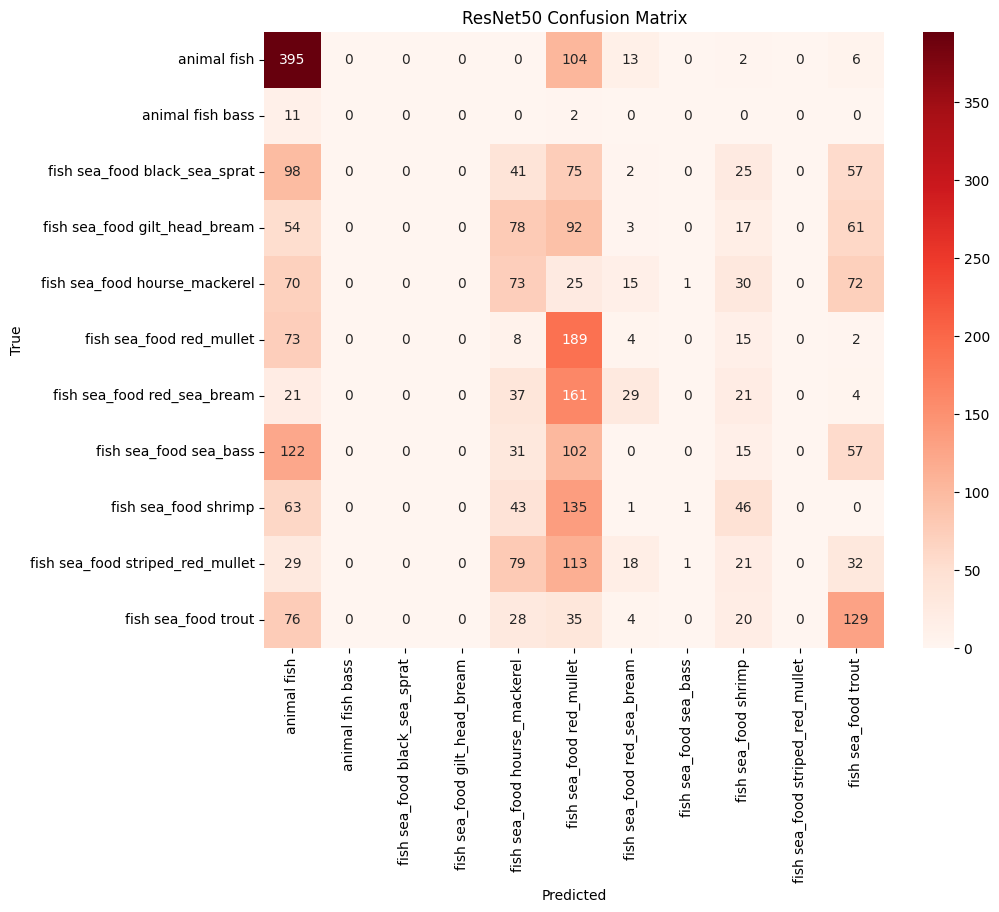

In [33]:
# Predict on test set
Y_pred = model_resnet.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Classification Report
report_resnet = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
print("Classification Report for ResNet50:")
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(), cmap='Reds')
plt.title('ResNet50 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

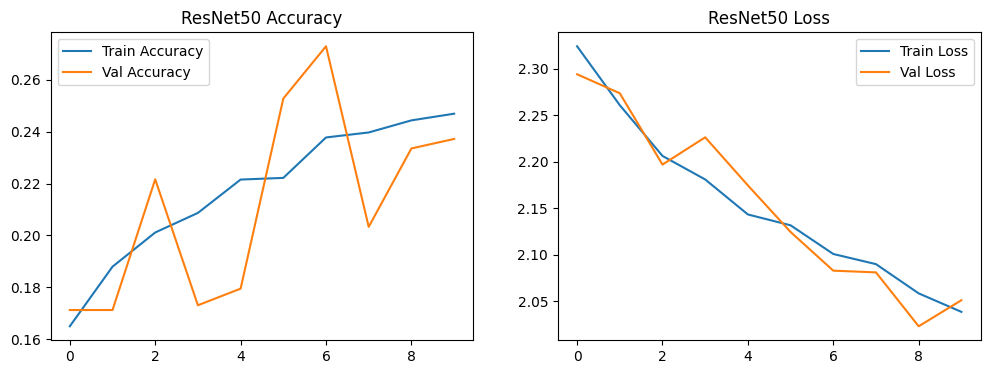

In [34]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Val Accuracy')
plt.title('ResNet50 Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Val Loss')
plt.title('ResNet50 Loss')
plt.legend()
plt.show()

In [35]:
# MobileNet

from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [37]:
# Load pre-trained MobileNet model without top
base_model_mobile = MobileNet(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model_mobile.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model_mobile.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(Num_classes, activation='softmax')(x)

model_mobile = Model(inputs=base_model_mobile.input, outputs=output)

# Compile the model
model_mobile.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

C:\Users\Sreeja S\AppData\Local\Temp\ipykernel_14952\499666302.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobile = MobileNet(weights='imagenet', include_top=False, input_shape=(*img_size, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 64s 4us/step


In [38]:
checkpoint_mobile = ModelCheckpoint("mobilenet_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_mobile = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_mobile = model_mobile.fit(
    train_generator,
    validation_data=val_generator,
    epochs=Epochs,
    callbacks=[checkpoint_mobile, early_stop_mobile]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 995ms/step - accuracy: 0.7114 - loss: 0.9870

195/195 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.7123 - loss: 0.9844 - val_accuracy: 0.9835 - val_loss: 0.0975
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9824 - loss: 0.0905

195/195 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9824 - loss: 0.0904 - val_accuracy: 0.9899 - val_loss: 0.0436
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.9899 - loss: 0.0509 - val_accuracy: 0.9863 - val_loss: 0.0491
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 957ms/step - accuracy: 0.9936 - loss: 0.0335

195/195 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.9936 - loss: 0.0334 - val_accuracy: 0.9973 - val_loss: 0.0194
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.9930 - loss: 0.0253 - val_accuracy: 0.9954 - val_loss: 0.0270


100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 739ms/step
Classification Report for MobileNet:
                                  precision    recall  f1-score   support

                     animal fish       0.99      1.00      1.00       520
                animal fish bass       1.00      0.69      0.82        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       1.00      1.00      1.00       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       1.00      0.99      1.00       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      1.00      1.00       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accur

c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

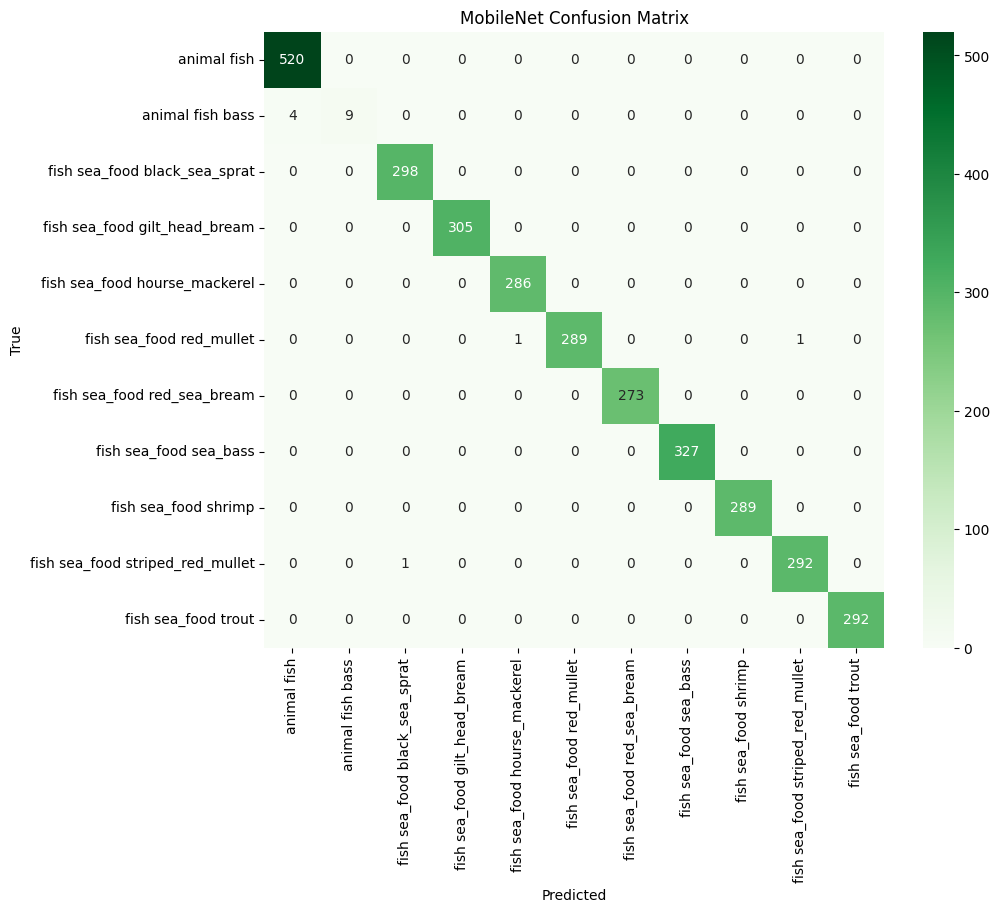

In [39]:
# Predict test set
Y_pred_mobile = model_mobile.predict(test_generator)
y_pred_mobile = np.argmax(Y_pred_mobile, axis=1)

# Classification report
report_mobilenet = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
print("Classification Report for MobileNet:")
print(classification_report(test_generator.classes, y_pred_mobile, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm_mobile = confusion_matrix(test_generator.classes, y_pred_mobile)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mobile, annot=True, fmt='d',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(),
            cmap='Greens')
plt.title('MobileNet Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

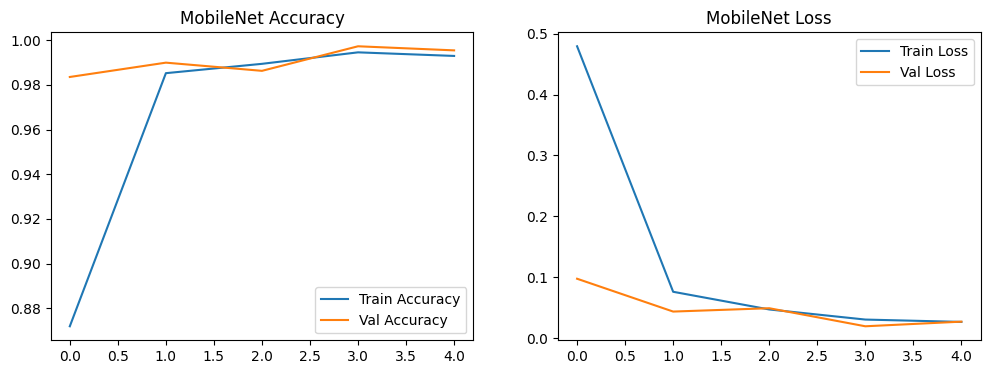

In [40]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mobile.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobile.history['val_accuracy'], label='Val Accuracy')
plt.title('MobileNet Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mobile.history['loss'], label='Train Loss')
plt.plot(history_mobile.history['val_loss'], label='Val Loss')
plt.title('MobileNet Loss')
plt.legend()
plt.show()

In [41]:
# InceptionV3

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [42]:
# Load pre-trained InceptionV3 without top
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model_inception.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model_inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(Num_classes, activation='softmax')(x)

model_inception = Model(inputs=base_model_inception.input, outputs=output)

# Compile the model
model_inception.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [43]:
checkpoint_inception = ModelCheckpoint("inception_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_inception = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_inception = model_inception.fit(
    train_generator,
    validation_data=val_generator,
    epochs=Epochs,
    callbacks=[checkpoint_inception, early_stop_inception]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7194 - loss: 0.9025

195/195 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.7201 - loss: 0.9003 - val_accuracy: 0.9625 - val_loss: 0.1595
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.9414 - loss: 0.1893 - val_accuracy: 0.9615 - val_loss: 0.1188
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9592 - loss: 0.1318

195/195 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.9592 - loss: 0.1318 - val_accuracy: 0.9780 - val_loss: 0.0728
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 331s 2s/step - accuracy: 0.9671 - loss: 0.1010 - val_accuracy: 0.9771 - val_loss: 0.0632
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.9776 - loss: 0.0779 - val_accuracy: 0.9780 - val_loss: 0.0686


100/100 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step
Classification Report for InceptionV3:
                                  precision    recall  f1-score   support

                     animal fish       0.99      0.98      0.99       520
                animal fish bass       0.82      0.69      0.75        13
   fish sea_food black_sea_sprat       0.98      1.00      0.99       298
   fish sea_food gilt_head_bream       0.96      1.00      0.98       305
   fish sea_food hourse_mackerel       0.99      1.00      0.99       286
        fish sea_food red_mullet       0.96      1.00      0.98       291
     fish sea_food red_sea_bream       1.00      0.99      0.99       273
          fish sea_food sea_bass       0.99      0.96      0.97       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.99      0.94      0.96       293
             fish sea_food trout       0.98      0.99      0.98       292

                        accur

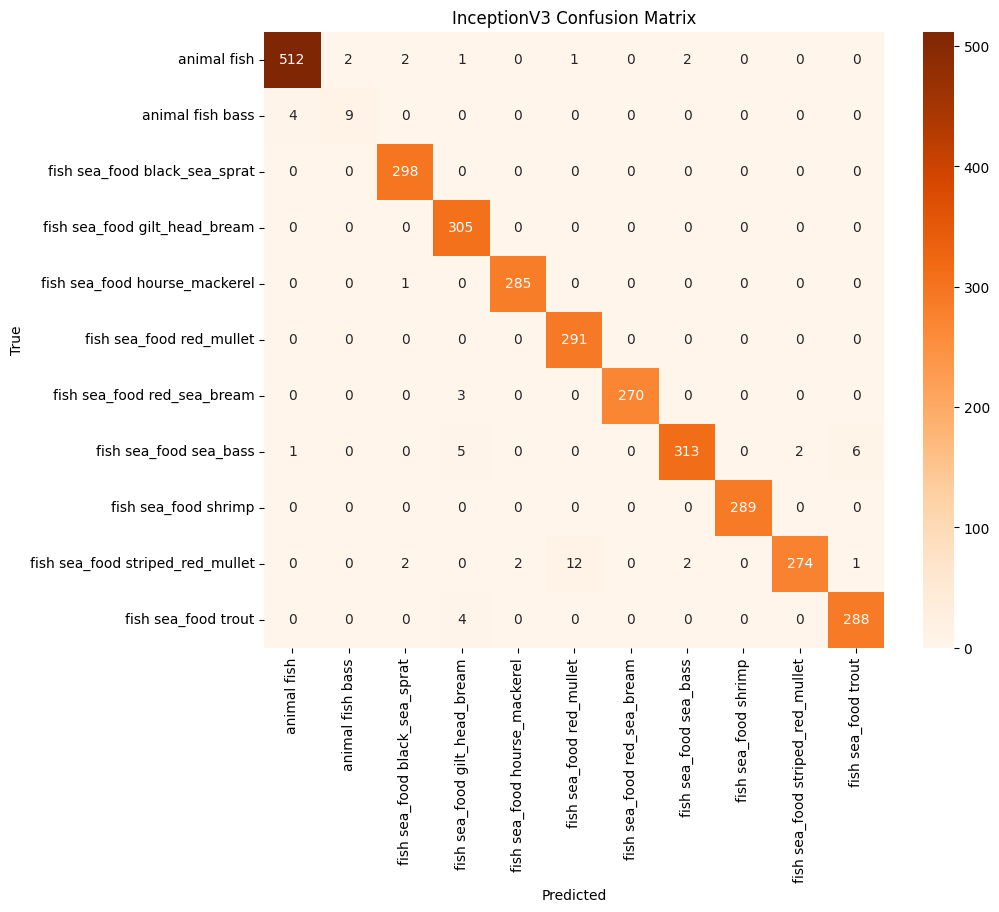

In [44]:
# Predict test set
Y_pred_inception = model_inception.predict(test_generator)
y_pred_inception = np.argmax(Y_pred_inception, axis=1)

# Classification report
report_inception = classification_report(y_true, y_pred_inception, target_names=class_labels, output_dict=True)
print("Classification Report for InceptionV3:")
print(classification_report(test_generator.classes, y_pred_inception, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm_inception = confusion_matrix(test_generator.classes, y_pred_inception)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_inception, annot=True, fmt='d',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(),
            cmap='Oranges')
plt.title('InceptionV3 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

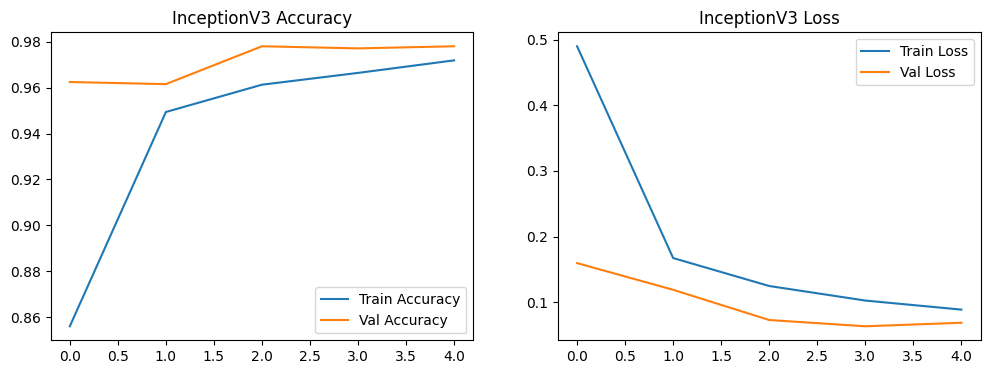

In [45]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_inception.history['accuracy'], label='Train Accuracy')
plt.plot(history_inception.history['val_accuracy'], label='Val Accuracy')
plt.title('InceptionV3 Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_inception.history['loss'], label='Train Loss')
plt.plot(history_inception.history['val_loss'], label='Val Loss')
plt.title('InceptionV3 Loss')
plt.legend()
plt.show()

In [46]:
# EfficientNetB0

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [47]:
# Load pre-trained EfficientNetB0 without top
base_model_efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model_efficientnet.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model_efficientnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(Num_classes, activation='softmax')(x)

model_efficientnet = Model(inputs=base_model_efficientnet.input, outputs=output)

# Compile the model
model_efficientnet.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

In [48]:
checkpoint_efficientnet = ModelCheckpoint("efficientnet_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_efficientnet = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_efficientnet = model_efficientnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=Epochs,
    callbacks=[checkpoint_efficientnet, early_stop_efficientnet]
) 

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 2.3263

195/195 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.1727 - loss: 2.3262 - val_accuracy: 0.1712 - val_loss: 2.3214
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.1813 - loss: 2.3019 - val_accuracy: 0.1712 - val_loss: 2.3176
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.1797 - loss: 2.2972 - val_accuracy: 0.1712 - val_loss: 2.3099
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.1757 - loss: 2.3002 - val_accuracy: 0.1712 - val_loss: 2.3145


100/100 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step
Classification Report for EfficientNetB0:
                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.00      0.00      0.00       292

                        ac

c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sreeja S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

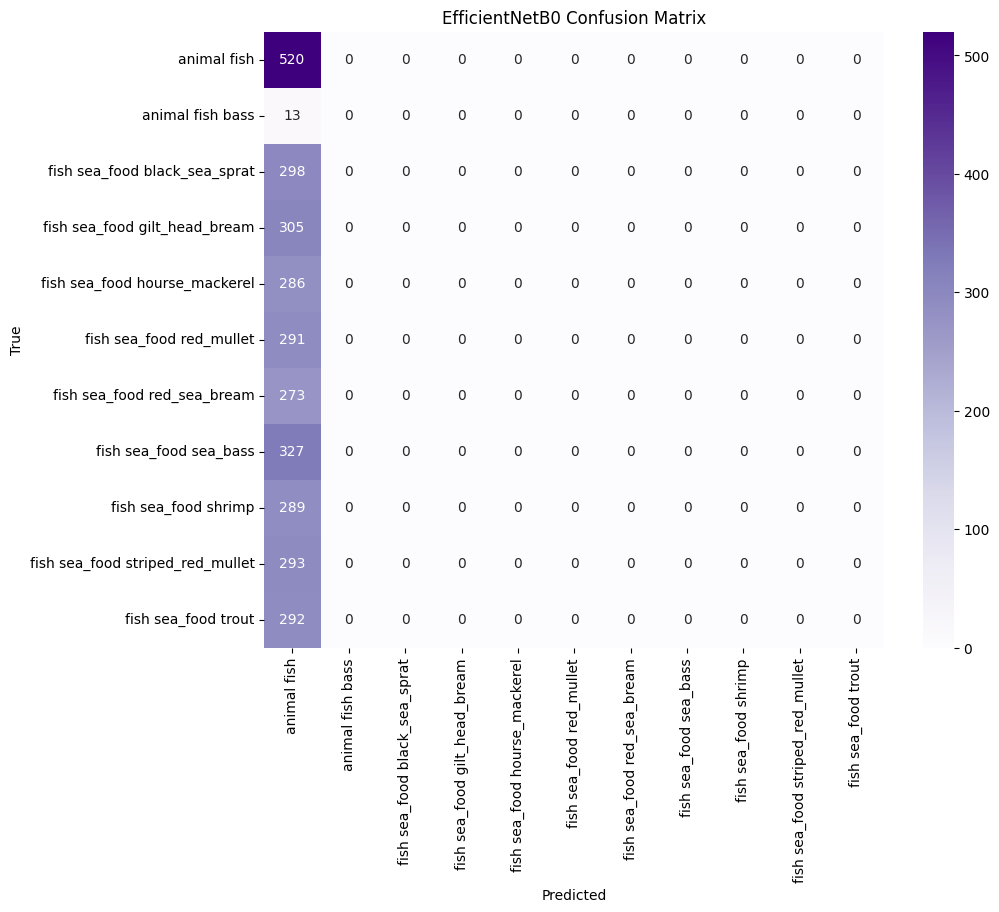

In [49]:
# Predict test set
Y_pred_efficientnet = model_efficientnet.predict(test_generator)
y_pred_efficientnet = np.argmax(Y_pred_efficientnet, axis=1)

# Classification report
report_effnet = classification_report(y_true, y_pred_efficientnet, target_names=class_labels, output_dict=True)
print("Classification Report for EfficientNetB0:")
print(classification_report(test_generator.classes, y_pred_efficientnet, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm_efficientnet = confusion_matrix(test_generator.classes, y_pred_efficientnet)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_efficientnet, annot=True, fmt='d',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(),
            cmap='Purples')
plt.title('EfficientNetB0 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

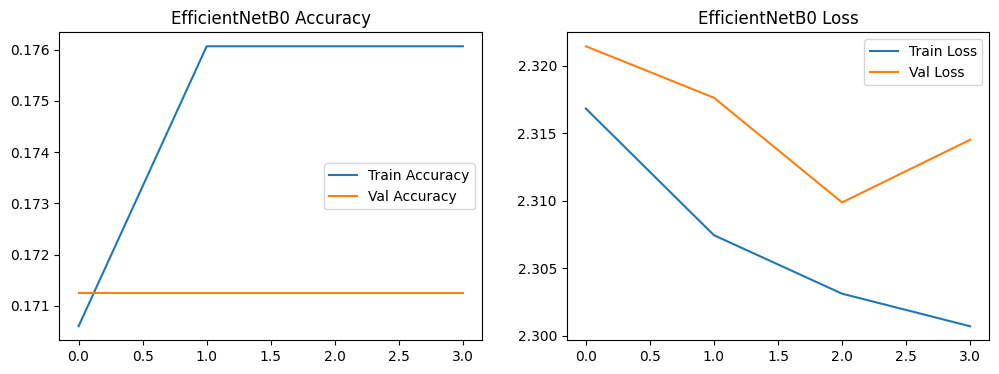

In [50]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_efficientnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_efficientnet.history['val_accuracy'], label='Val Accuracy')
plt.title('EfficientNetB0 Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_efficientnet.history['loss'], label='Train Loss')
plt.plot(history_efficientnet.history['val_loss'], label='Val Loss')
plt.title('EfficientNetB0 Loss')
plt.legend()
plt.show()

In [51]:
import pandas as pd

# Combine key metrics (weighted avg) from each report
summary = {
    'Model': ['VGG16', 'ResNet50', 'MobileNet', 'InceptionV3', 'EfficientNetB0'],
    'Accuracy': [
        report_vgg['accuracy'],
        report_resnet['accuracy'],
        report_mobilenet['accuracy'],
        report_inception['accuracy'],
        report_effnet['accuracy']
    ],
    'Precision': [
        report_vgg['weighted avg']['precision'],
        report_resnet['weighted avg']['precision'],
        report_mobilenet['weighted avg']['precision'],
        report_inception['weighted avg']['precision'],
        report_effnet['weighted avg']['precision']
    ],
    'Recall': [
        report_vgg['weighted avg']['recall'],
        report_resnet['weighted avg']['recall'],
        report_mobilenet['weighted avg']['recall'],
        report_inception['weighted avg']['recall'],
        report_effnet['weighted avg']['recall']
    ],
    'F1-Score': [
        report_vgg['weighted avg']['f1-score'],
        report_resnet['weighted avg']['f1-score'],
        report_mobilenet['weighted avg']['f1-score'],
        report_inception['weighted avg']['f1-score'],
        report_effnet['weighted avg']['f1-score']
    ]
}

df_summary = pd.DataFrame(summary)
print(df_summary)

            Model  Accuracy  Precision    Recall  F1-Score
0           VGG16  0.732036   0.736985  0.732036  0.718941
1        ResNet50  0.270160   0.171792  0.270160  0.192393
2       MobileNet  0.270160   0.171792  0.270160  0.192393
3     InceptionV3  0.983370   0.983560  0.983370  0.983244
4  EfficientNetB0  0.163163   0.026622  0.163163  0.045775


In [52]:
import json

with open("class_indices.json", "w") as f:
    json.dump(train_generator.class_indices, f)